# Минимально обработаем фрейм

In [113]:
import pandas as pd
%matplotlib inline
df = pd.read_csv("data.tsv", sep="\t", header=0, names = ("query", "ts", "ui"))

df['query'] = df['query'].map(lambda x: x.lower())
df['query'] = df['query'].str.replace('ё','е')

df

,query,ts,ui
0,малевич картины,1631806465,desktop
1,секс,1631781583,touch
2,с днем рождения лена,1631771563,touch
3,зверополис порно,1631787599,touch
4,алабай собака фото,1631786645,touch
...,...,...,...
1203818,бабочка,1631475653,touch
1203819,все республики россии,1631462934,touch
1203820,кухня в стиле лофт,1631432252,touch
1203821,топор,1631449347,desktop


# 1. Top 10 запросов

In [106]:
from IPython.display import display_html
from itertools import chain,cycle

In [107]:

#Функция которая позволяет вывести два df рядом для удобности сравнения
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2>{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)
    

In [267]:

d_df = df[df["ui"] == "desktop"]
t_df = df[df["ui"] == "touch"]

d_df_f = d_df.groupby(["query"]).count().sort_values("ts", ascending=False).head(10).reset_index()[['query', 'ts']].rename({'ts' : 'frequency'}, axis='columns') # f = frequent
t_df_f = t_df.groupby(["query"]).count().sort_values("ts", ascending=False).head(10).reset_index()[['query', 'ts']].rename({'ts' : 'frequency'}, axis='columns')


In [109]:
display_side_by_side(d_df_f, t_df_f, titles = ['Desktop', 'Touch'])

,query,frequency
0,календарь 2021,2810
1,таблица менделеева,2659
2,картинки,1720
3,порно,1408
4,английский алфавит,1352
5,обои на рабочий стол,1143
6,одноклассники (социальная сеть),1116
7,секс,947
8,алфавит,923
9,таблица квадратов,883


# 2. Распределение в течении дня

In [110]:
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (12,8)
sns.set_style("darkgrid")

In [111]:

d_hours = pd.to_datetime(d_df['ts'], unit='s').apply(lambda x: x.time().hour)
t_hours = pd.to_datetime(t_df['ts'], unit='s').apply(lambda x: x.time().hour)


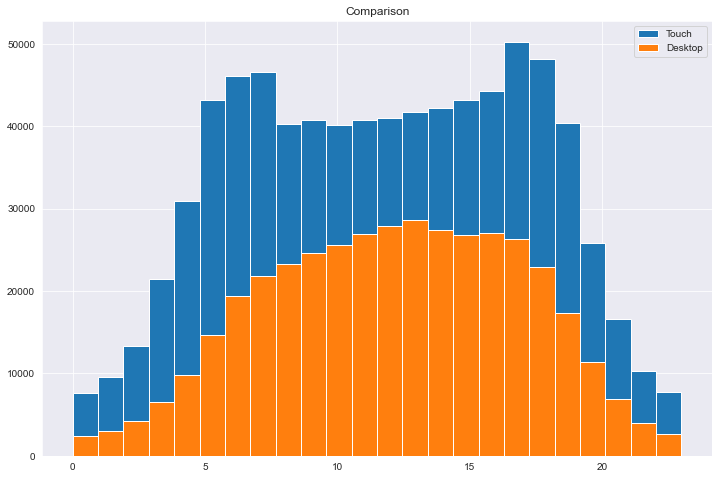

In [112]:

t_hours.hist(bins=24)
d_hours.hist(bins=24)
plt.title('Сomparison')
plt.legend(['Touch', 'Desktop'])

plt.show()


# 3. Контрастные тематики

In [261]:
df.groupby(["query"]).count().reset_index()

,query,ts,ui
0,+18,45,45
1,+18 video,26,26
2,002,19,19
3,02 аниме,64,64
4,02 милый во франсе,30,30
...,...,...,...
23776,سكس,83,83
23777,幼女,16,16
23778,视频,69,69
23779,보지,16,16


## Код для первой идеи 

In [255]:
import numpy as np

In [ ]:

ddf1 = df[df["ui"] == "desktop"]

ddf1.loc['query'] = ddf1['query'].map(lambda x: x.split(' ')) #разрезали запросы по словам


In [ ]:

for i in range(ddf1.shape[0]):
    q = ddf1['query'].iloc[i] #искомый запрос
    #создаем колонку с пересечением в процентах с каждым запросом 
    ddf1['res'] = ddf1['query'].map(lambda x: len(np.intersect1d(q, x))/len(x)) 
    #Заменяем все похожие запросы на искомые 
    ddf1.loc[ddf1[ddf1['res'] >= 0.5].index, 'query'] = ddf1.loc[ddf1[ddf1['res'] >= 0.5].index, 'query'].apply(lambda x: q)


In [ ]:
ddf1['query'] = ddf1['query'].str.join(' ') #сращиваем запросы

In [ ]:
df1.groupby(by='query').count().sort_values("ts", ascending=False).head() #смотрим на результат тематизирования для decktop

## Код для третьей идеи

In [376]:
import numpy as np
from collections import Counter

def sorted_dict(x):
    sdict = {}
    skeys = sorted(x, key=x.get, reverse = True)
    for w in skeys:
        sdict[w] = x[w]
    return(sdict)

ss = ['и', 'да', 'ни', 'тоже', 'также', 'а', 'но', 'однако',
    'зато', 'же', 'или', 'либо', 'что', 'чтобы', 'будто',
    'когда', 'пока', 'едва', 'если', 'раз', 'чтобы', 'дабы',
    'хотя', 'хоть', 'пускай', 'как', 'словно', 'кто', 'каков',
    'который', 'куда', 'откуда', 'где', 'сколько', 'почему', 
      'зачем', 'как', '', 'для', 'на', 'в', 'c', 'с', 'это', 'по']
#Возможна реализация и более сложных фильтров, можно попробовать с помощью regex выкинуть приставки/окончания и получить семантическое ядро

In [355]:
ddf1 = df[df["ui"] == "desktop"]
ddf2 = df[df["ui"] == "touch"]

In [356]:
st1 = ''
for i in range(ddf1.shape[0]):
    st1 += ' ' + ddf1['query'].iloc[i] + ' '
    
st2 = ''
for i in range(ddf2.shape[0]):
    st2 += ' ' + ddf2['query'].iloc[i] + ' '

In [431]:
dict1 = sorted_dict(Counter(st1.split(' ')))
dict2 = sorted_dict(Counter(st2.split(' ')))
#словари 1,2 = desktop, touch где хранится количество вхождений слова в запросах

In [432]:
for i in ss:
    z = dict1.pop(i, None)
    z = dict2.pop(i, None)
#чистим от мусорных слов

In [433]:
leng = len(dict1)
for i in dict1.keys():
    dict1[i] /= 9797
    dict1[i] = [dict1[i], 0]

In [434]:
leng = len(dict2)
for i in dict2.keys():
    dict2[i] /= 66211

In [435]:
#допишем значения touch к значениям desktop для слов из desktop
for i in dict2.keys():
    dict1[i][1] = dict2[i]
#выброс тут означают, что такого элемента в dict1 вообще нет, не влияет на логику решения

KeyError: 'apetube'

In [474]:
ans = {}
for i in dict1.keys():
    if dict1[i][1] == 0:
        ans[i] = dict1[i]
    else:
        if (dict1[i][1]/dict1[i][0] > 2 and dict1[i][1] > dict1[i][0]) or (dict1[i][0]/dict1[i][1] > 2 and dict1[i][0] > dict1[i][1]):
            ans[i] = dict1[i]

            
for i in dict2.keys():
    if i not in dict1.keys():
        ans[i] = [0, dict2[i]]

In [482]:
answer = pd.DataFrame(ans).T.rename(columns={0 : 'Desktop', 1 : 'Touch'})

In [483]:
answer

,Desktop,Touch
календарь,1.000000,0.097990
2021,0.963662,0.249475
таблица,0.959682,0.100829
картинки,0.861692,0.425654
карта,0.675615,0.152920
...,...,...
адлере,0.000000,0.000015
фф,0.000000,0.000015
точный,0.000000,0.000015
хабиба,0.000000,0.000015
